<a href="https://colab.research.google.com/github/rebeccadimatteo/ExplainableAI/blob/main/IngegnerizzazioneDatiConsumoAlcolStudentiMatematica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LETTURA FILE CSV CON DATASET**


In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from six.moves import urllib

import seaborn as sb
from matplotlib import style

style.use('seaborn-whitegrid')

plt.rcParams['figure.figsize'] = (20,10)

DOWNLOAD_ROOT="https://raw.githubusercontent.com/rebeccadimatteo/ExplainableAI/master/datasetMatematica.csv"

#fetch dataset da github
def fetch_file_data1(file_url1=DOWNLOAD_ROOT, file_path1="file"):
  os.makedirs(file_path1, exist_ok=True)
  csv_path1 = os.path.join(file_path1, "datasetMatematica.csv")
  urllib.request.urlretrieve(file_url1, csv_path1)
fetch_file_data1()

#df è la variabile che contiene il dataset
df=pd.read_csv("file/datasetMatematica.csv")
df.head(2)




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


##**DATA CLEANING**

In [3]:
#verifica se ci sono dati null nel dataset
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
#verifica se ci sono dati NA nel dataset
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [4]:
# statistiche descrittive di base per tutte le colonne
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


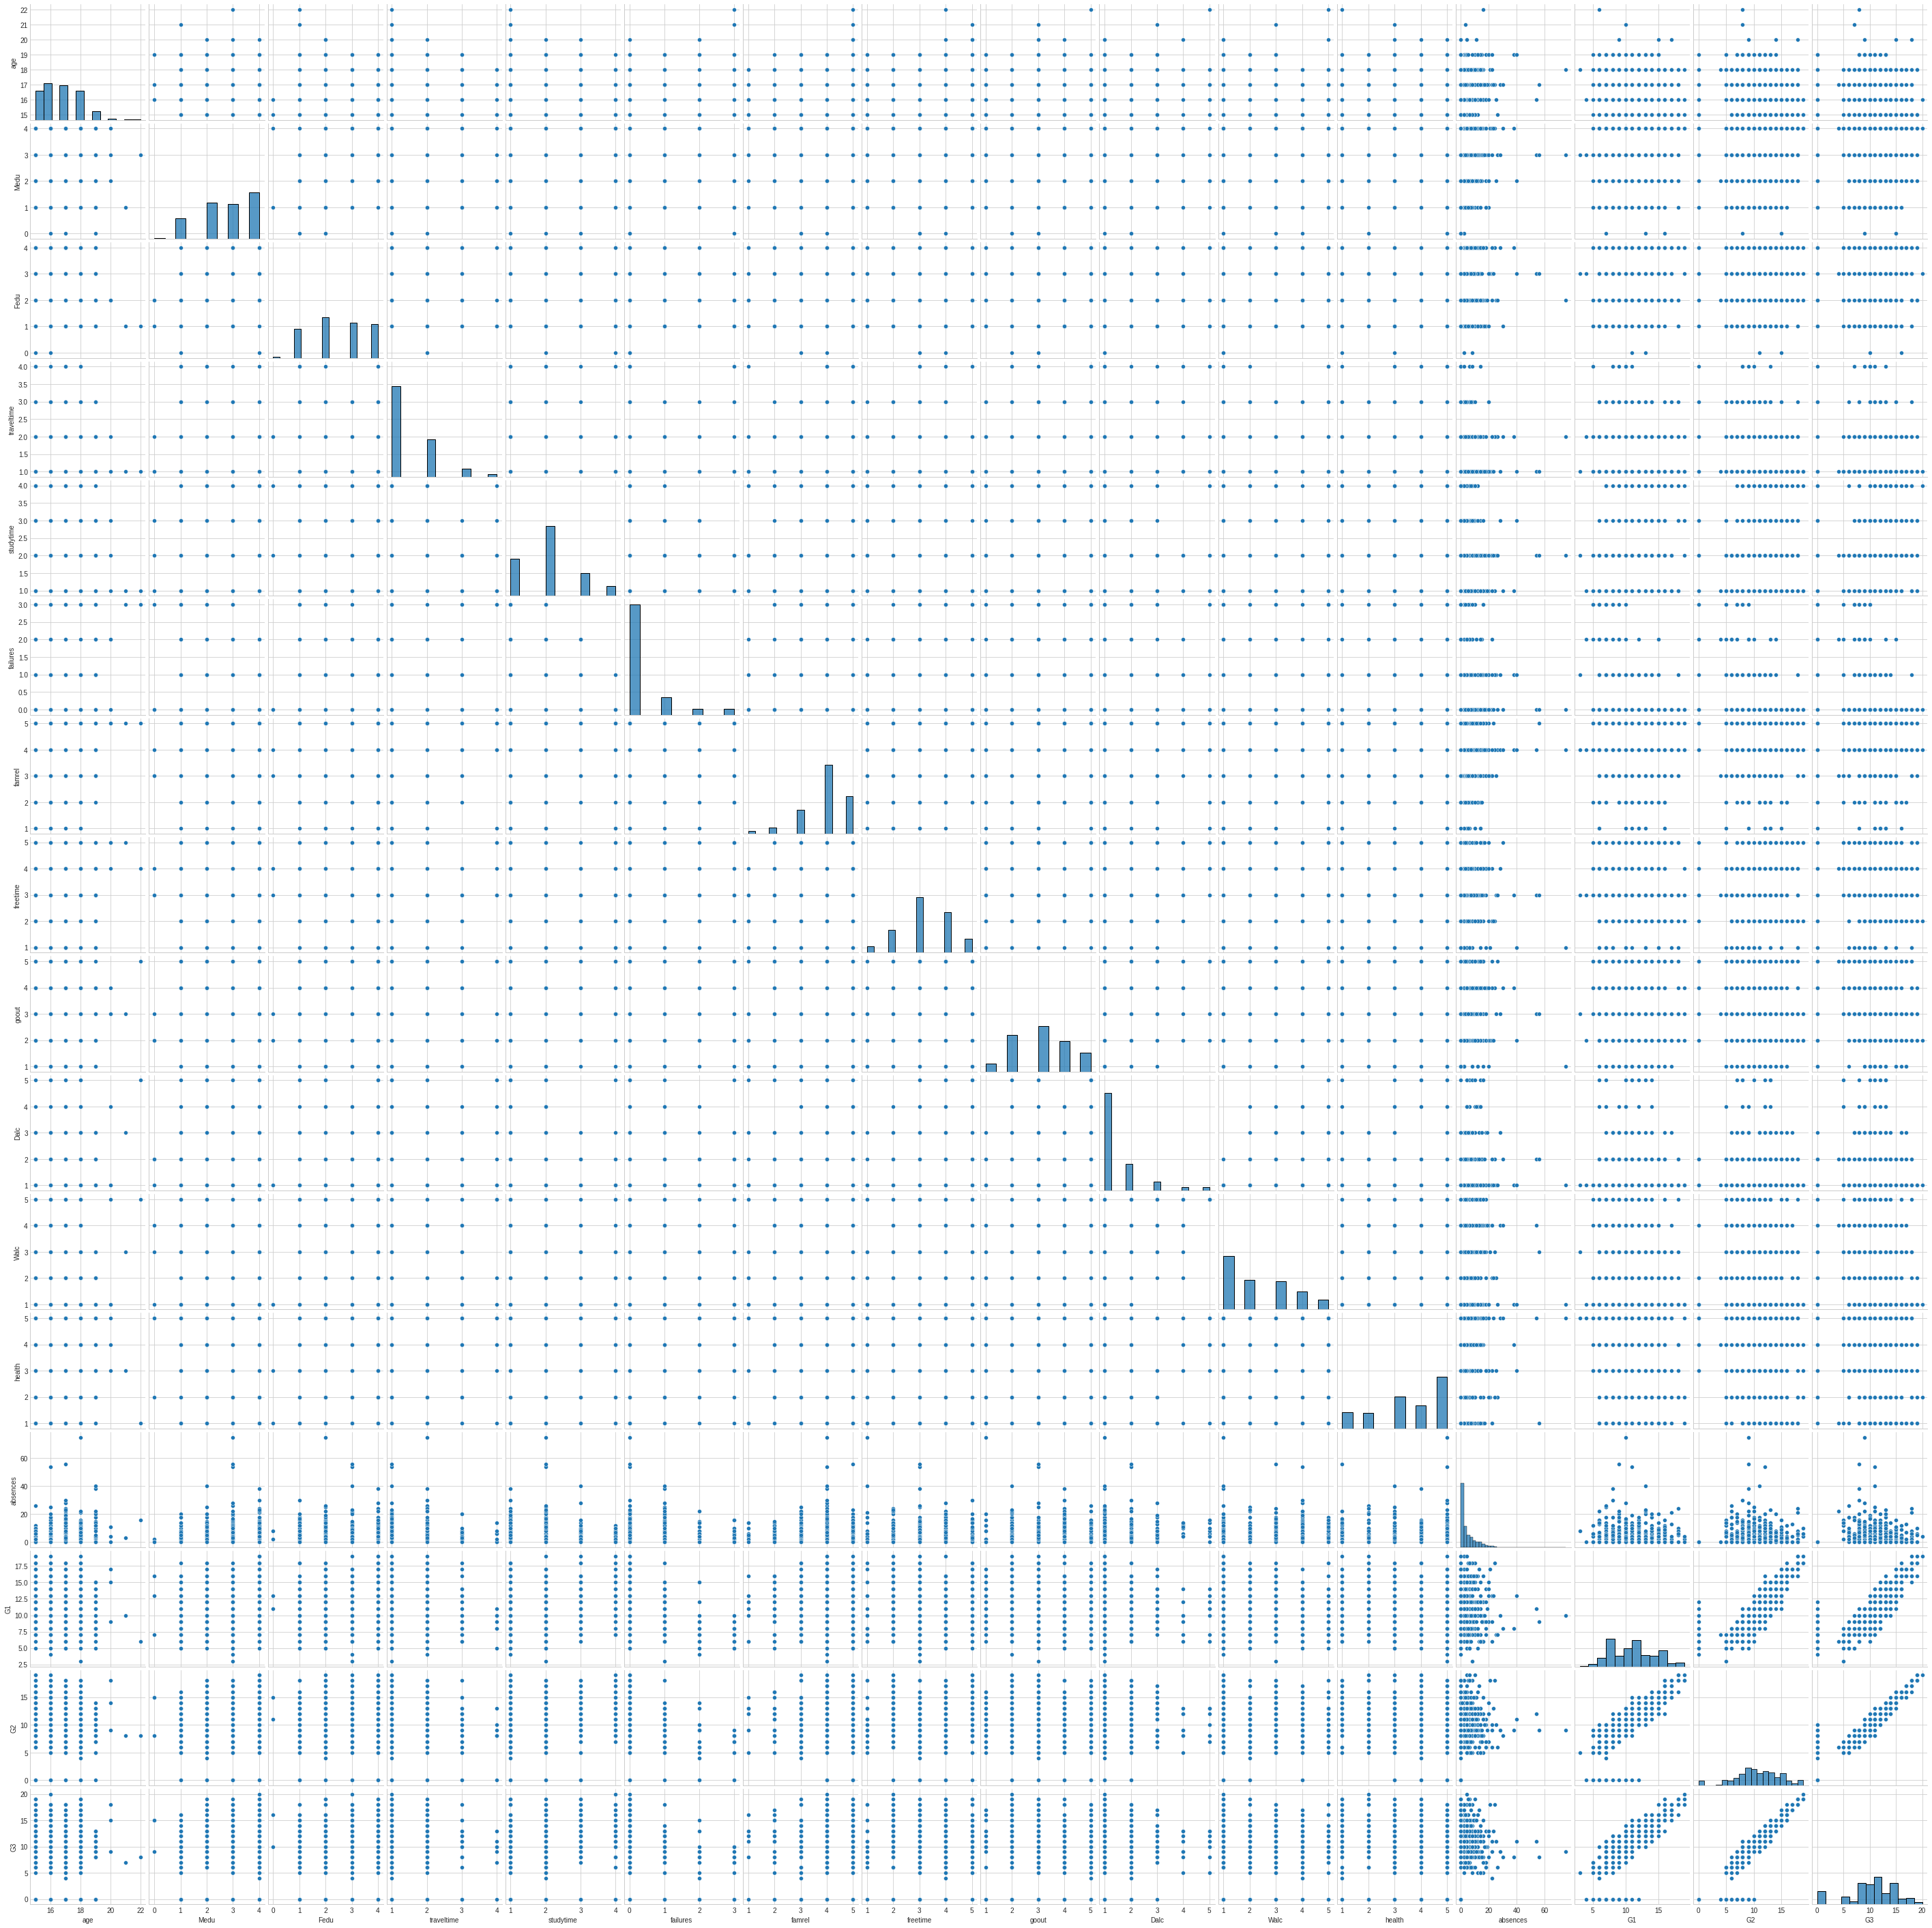

In [5]:
#data plot visualizzare dipendenze tra variabili
sb.pairplot(df)
#salvataggio plot
plt.savefig('pairplor.png')

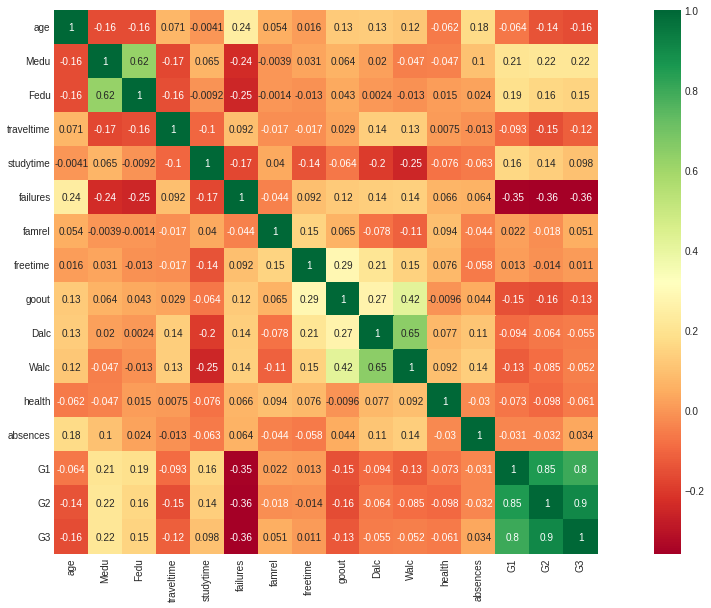

In [6]:
#correlazione tra le variabili
sb.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True)

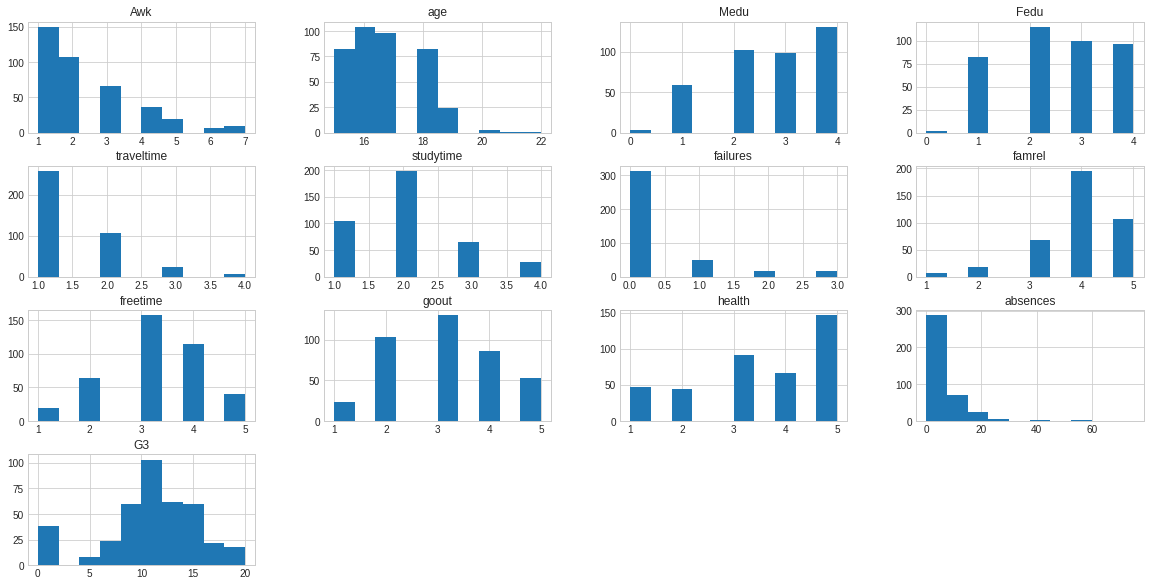

In [47]:
#Eliminazione variabil indipendenti G1,G2 e unione Dalc e Walc in Awk(variabile dipendente)
df=df.drop(columns='G1')
df=df.drop(columns='G2')
dalc=df.Dalc
walk=df.Walc
Awk=dalc+walk//2
df.insert(0,'Awk',Awk)
df=df.drop(columns='Dalc')
df=df.drop(columns='Walc')
#controllo bilanciamento
df.hist()
plt.show()


# **Divisione Training and Test, Feature Selection and Feature Scaling**

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


#divisione dipendente e indipendente
variabileDipendente=df.Awk
#trasformazione dataset stringhe in numeri
lb=LabelEncoder()
variabileIndipendenti=df[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','absences','G3']]
variabileIndipendenti.insert(0,'school',lb.fit_transform(df.school))
variabileIndipendenti.insert(0,'sex',lb.fit_transform(df.sex))
variabileIndipendenti.insert(0,'address',lb.fit_transform(df.address))
variabileIndipendenti.insert(0,'famsize',lb.fit_transform(df.famsize))
variabileIndipendenti.insert(0,'Pstatus',lb.fit_transform(df.Pstatus))
variabileIndipendenti.insert(0,'Mjob',lb.fit_transform(df.Mjob))
variabileIndipendenti.insert(0,'Fjob',lb.fit_transform(df.Fjob))
variabileIndipendenti.insert(0,'reason',lb.fit_transform(df.reason))
variabileIndipendenti.insert(0,'guardian',lb.fit_transform(df.guardian))
variabileIndipendenti.insert(0,'schoolsup',lb.fit_transform(df.schoolsup))
variabileIndipendenti.insert(0,'famsup',lb.fit_transform(df.famsup))
variabileIndipendenti.insert(0,'paid',lb.fit_transform(df.paid))
variabileIndipendenti.insert(0,'activities',lb.fit_transform(df.activities))
variabileIndipendenti.insert(0,'nursery',lb.fit_transform(df.nursery))
variabileIndipendenti.insert(0,'higher',lb.fit_transform(df.higher))
variabileIndipendenti.insert(0,'internet',lb.fit_transform(df.internet))
variabileIndipendenti.insert(0,'romantic',lb.fit_transform(df.romantic))
#divisione training e test
X_train, X_test, Y_train, Y_test=train_test_split(variabileIndipendenti,variabileDipendente,test_size=0.2,random_state=2)
select=SelectKBest(score_func=f_classif,k=10)
scaler=MinMaxScaler()
#feature scaling sui traing test
X_train_z = scaler.fit_transform(X_train)
X_test_z = scaler.transform(X_test)
#applicazione feature selection su train_z
X_train_z = select.fit_transform(X_train_z, Y_train)
X_test_z = select.transform(X_test_z)

print(X_train_z)



[[1.         0.         1.         ... 0.33333333 0.75       0.75      ]
 [0.         0.         1.         ... 0.         0.5        0.25      ]
 [0.         1.         0.         ... 0.         0.5        0.5       ]
 ...
 [1.         0.         1.         ... 0.66666667 0.5        0.75      ]
 [0.         0.         1.         ... 0.         0.75       0.75      ]
 [0.         1.         1.         ... 0.         0.         1.        ]]


# **Data Balancing**

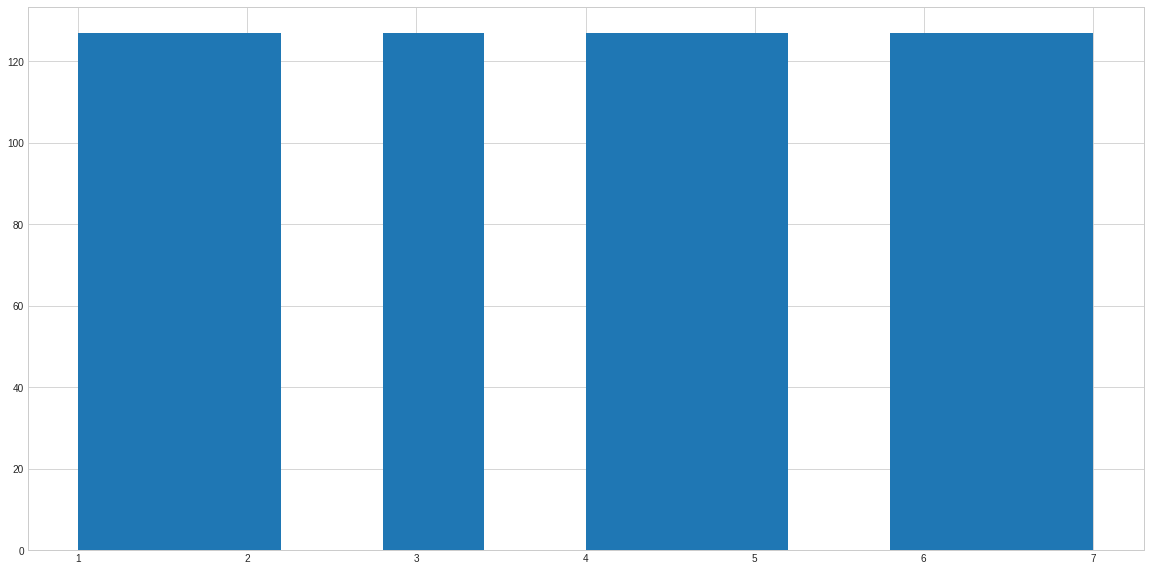

In [51]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
X_train_over, y_train_over= oversample.fit_resample(X_train, Y_train)
y_train_over.hist()
plt.show()

# **Create Model with Classification**